# Train a regression ConvNN model using BOHB tuner

In [92]:
import sys  
sys.path.insert(0, '../telescopeML/')

from ObservPredictor import * #ProcessObservationalDataset, ObsParameterPredictor
from DeepRegTrainer import TrainRegression
from StatVisAnalyzer import *

# Step 1: Load the dataset

In [93]:
# original dataset
df=pd.read_csv('../../datasets/browndwarf_R100_v4_newWL_v2.csv.bz2', compression='bz2')
df.head(3)

gravity  temperature  c_o_ratio  metallicity         2.512         2.487  \
0      5.0         1100       0.25         -1.0  9.103045e-08  1.181658e-07   
1      5.0         1100       0.25         -0.7  9.103045e-08  1.181658e-07   
2      5.0         1100       0.25         -0.5  9.103045e-08  1.181658e-07   

          2.462         2.438         2.413         2.389  ...         0.971  \
0  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  9.640859e-08   
1  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  9.640859e-08   
2  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  9.640859e-08   

          0.962         0.952         0.943         0.933         0.924  \
0  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08  5.127995e-08   
1  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08  5.127995e-08   
2  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08  5.127995e-08   

          0.915         0.906         0.897  is_augmented  
0  4.897355e-08  4.087795e-08  2.791689e-08            no  
1  4.897355e-08  4.087795e-08  2.791689e-08            no  
2  4.897355e-08  4.087795e-08  2.791689e-08            no  

[3 rows x 109 columns]

In [94]:
wl = pd.read_csv('../../datasets/wl.csv')
wl.head(3)

wl
0  2.511960
1  2.486966
2  2.462220

In [95]:
df.iloc[::10]

gravity  temperature  c_o_ratio  metallicity         2.512  \
0         5.00         1100       0.25         -1.0  9.103045e-08   
10        5.00         1100       0.25          1.7  8.540979e-09   
20        5.00         1100       0.50          1.0  2.089233e-08   
30        5.00         1100       1.00          0.5  3.773544e-08   
40        5.00         1100       1.50          0.0  7.403044e-08   
...        ...          ...        ...          ...           ...   
30840     3.25         1000       1.00         -1.0  6.179704e-08   
30850     3.25         1000       1.00          1.7  4.587650e-09   
30860     3.25         1000       1.50          1.0  9.151923e-09   
30870     3.25         1000       2.00          0.5  1.755109e-08   
30880     3.25         1000       2.50          0.0  3.686351e-08   

              2.487         2.462         2.438         2.413         2.389  \
0      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
10     9.610928e-09  8.362026e-09  6.331807e-09  5.411898e-09  3.597492e-09   
20     2.547443e-08  2.398659e-08  1.954245e-08  1.673706e-08  1.128757e-08   
30     4.306029e-08  3.789344e-08  2.982717e-08  2.555826e-08  1.704151e-08   
40     8.240733e-08  7.323895e-08  5.885655e-08  5.086389e-08  3.452053e-08   
...             ...           ...           ...           ...           ...   
30840  6.023661e-08  4.317990e-08  3.128656e-08  2.771920e-08  1.748527e-08   
30850  3.838308e-09  2.586146e-09  1.860407e-09  1.635306e-09  1.152218e-09   
30860  7.599074e-09  4.870096e-09  3.395405e-09  2.993091e-09  2.001870e-09   
30870  1.456820e-08  9.125922e-09  6.253583e-09  5.540055e-09  3.570220e-09   
30880  3.103918e-08  1.962829e-08  1.351563e-08  1.204704e-08  7.567159e-09   

       ...         0.971         0.962         0.952         0.943  \
0      ...  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   
10     ...  2.589948e-09  1.400508e-09  1.423739e-09  1.331622e-09   
20     ...  1.030422e-08  6.744711e-09  6.570654e-09  5.994584e-09   
30     ...  3.370933e-08  2.475817e-08  2.292027e-08  2.084380e-08   
40     ...  1.067845e-07  8.506743e-08  7.629151e-08  6.833675e-08   
...    ...           ...           ...           ...           ...   
30840  ...  6.074206e-08  4.763676e-08  4.974581e-08  4.320090e-08   
30850  ...  1.364340e-09  8.768095e-10  8.903187e-10  7.791423e-10   
30860  ...  8.316857e-09  5.922216e-09  5.734787e-09  5.036230e-09   
30870  ...  3.041929e-08  2.417082e-08  2.437794e-08  2.183006e-08   
30880  ...  8.623869e-08  7.376951e-08  7.271418e-08  6.568662e-08   

              0.933         0.924         0.915         0.906         0.897  \
0      4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08   
10     5.718932e-10  2.525684e-09  2.577776e-09  2.171606e-09  1.170498e-09   
20     3.266539e-09  6.722988e-09  6.756289e-09  5.708415e-09  3.422240e-09   
30     1.293259e-08  1.818421e-08  1.723477e-08  1.401317e-08  8.880054e-09   
40     4.665959e-08  5.297000e-08  4.829532e-08  3.887601e-08  2.587082e-08   
...             ...           ...           ...           ...           ...   
30840  2.942153e-08  4.588604e-08  4.660016e-08  3.899730e-08  2.401752e-08   
30850  4.586279e-10  1.281345e-09  9.366753e-10  5.737637e-10  3.020979e-10   
30860  3.292385e-09  4.859911e-09  3.820969e-09  2.376922e-09  1.196810e-09   
30870  1.552078e-08  1.638151e-08  1.205167e-08  7.349473e-09  3.697040e-09   
30880  4.948854e-08  5.133128e-08  4.178225e-08  2.698869e-08  1.426723e-08   

       is_augmented  
0                no  
10               no  
20               no  
30               no  
40               no  
...             ...  
30840            no  
30850            no  
30860            no  
30870            no  
30880            no  

[3089 rows x 109 columns]

## Prepare feature variables (X) and targets (y)

In [96]:
df = df[df['is_augmented'].isin(['no'])]
X = df.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)

y = df[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


In [97]:
y['temperature'] = np.log10(y['temperature'])

/tmp/ipykernel_28718/3354840019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['temperature'] = np.log10(y['temperature'])


In [98]:
# print( 'skewness:' )
# display(set( zip(['gravity', 'c_o_ratio', 'metallicity', 'temperature'],(stats.skew(y[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]])))))
# y.hist(grid=True, bins=19);

In [99]:
y.head()

gravity  c_o_ratio  metallicity  temperature
0      5.0       0.25         -1.0     3.041393
1      5.0       0.25         -0.7     3.041393
2      5.0       0.25         -0.5     3.041393
3      5.0       0.25         -0.3     3.041393
4      5.0       0.25          0.0     3.041393

---

# Step 2: Data Processing

In [100]:
# Create an instance of TrainCNNRegression
train_cnn_regression = TrainRegression(feature_values=X,
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             n_jobs=4,
                             cv=5,
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN')

In [101]:
# Split the dataset into train and test sets
train_cnn_regression.split_train_validation_test(test_size=0.1, val_size=0.1)

In [102]:
# normalize the X features using MinMax Scaler
train_cnn_regression.standardize_X_row_wise()

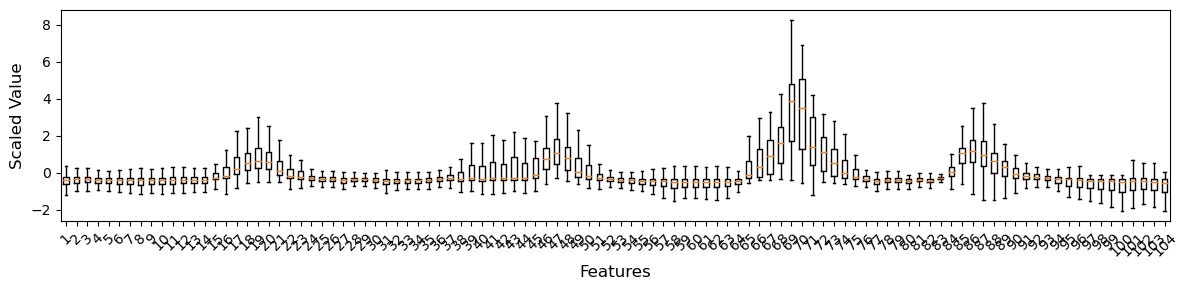

In [103]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_train_standardized_rowwise, xticks_list = None)

In [104]:
# Standardize the y features using Standard Scaler
train_cnn_regression.standardize_y_column_wise()

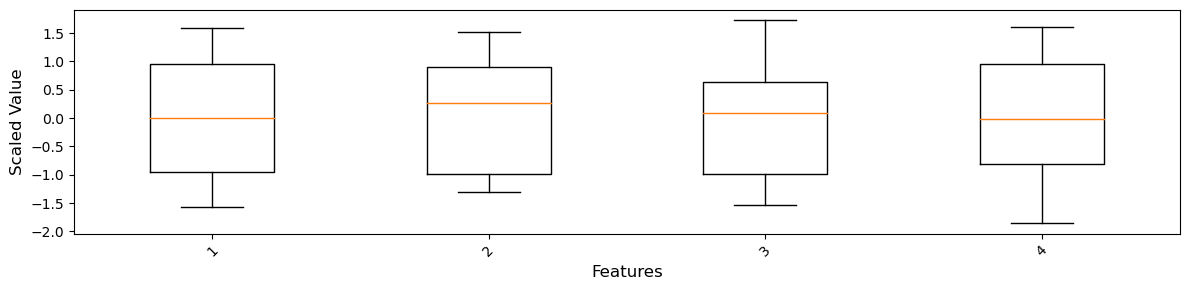

In [105]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.y_train_standardized_columnwise)

In [106]:
# train_cnn_regression.y_train_standardized_columnwise

In [107]:
train_cnn_regression.X_train_min = train_cnn_regression.X_train.min(axis=1)
train_cnn_regression.X_train_max = train_cnn_regression.X_train.max(axis=1)

In [108]:
train_cnn_regression.X_val_min = train_cnn_regression.X_val.min(axis=1)
train_cnn_regression.X_val_max = train_cnn_regression.X_val.max(axis=1)

In [109]:
train_cnn_regression.X_test_min = train_cnn_regression.X_test.min(axis=1)
train_cnn_regression.X_test_max = train_cnn_regression.X_test.max(axis=1)

In [110]:
df_MinMax_train = pd.DataFrame((train_cnn_regression.X_train_min, train_cnn_regression.X_train_max)).T
df_MinMax_val = pd.DataFrame((train_cnn_regression.X_val_min, train_cnn_regression.X_val_max)).T
df_MinMax_test = pd.DataFrame((train_cnn_regression.X_test_min, train_cnn_regression.X_test_max)).T

In [111]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [112]:
df_MinMax_train.head()

min           max
28744  8.265340e-12  3.445259e-08
6288   8.080712e-22  8.397132e-14
13749  2.734403e-07  8.632182e-06
11713  4.414951e-16  3.373262e-10
15538  3.722576e-07  6.859888e-06

In [113]:
# plt.loglog(train_cnn_regression.X_train_max, 'k.', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train, 'r.', label='X_train', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train_min, 'r.', alpha = 0.4)

---

In [114]:
train_cnn_regression.standardize_X_column_wise(
                                                X_train = df_MinMax_train.values,
                                                X_val   = df_MinMax_val.values,
                                                X_test  = df_MinMax_test.values,
                                                )

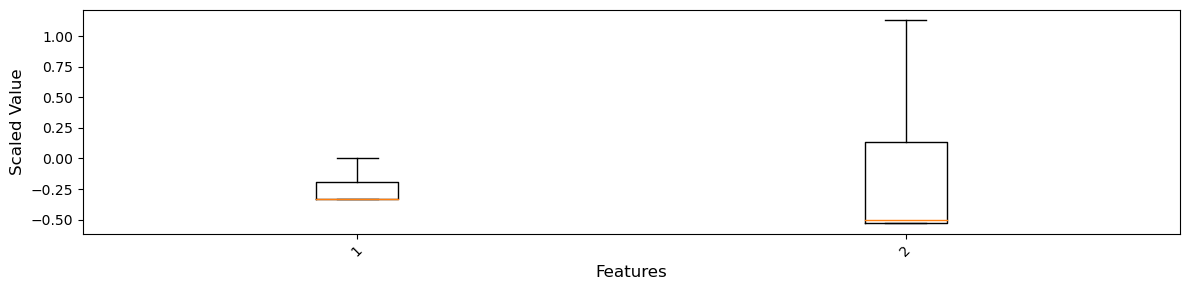

In [115]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_test_standardized_columnwise)

# Step 3: Load the Trained CNN model

## Load Saved Models

In [116]:
model = load_model('../../outputs/trained_models/my_model_architecture__xStand_yStand_MinMax_v2.h5')
model.load_weights('../../outputs/trained_models/my_model_weights__xStand_yStand_MinMax_v2.h5')

# Loading the saved history object
with open('../../outputs/trained_models/training_history__xStand_yStand_MinMax_v2.pkl', 'rb') as file:
    history = pk.load(file)    

In [117]:
# model = load_model('../../outputs/trained_models/trained_CNN_architecture_BOHB_parameters_v1.h5')
# model.load_weights('../../outputs/trained_models/trained_CNN_weights_BOHB_parameters_v1.h5')

# # Loading the saved history object
# with open('../../outputs/trained_models/trained_CNN_history_BOHB_parameters_v1.pkl', 'rb') as file:
#     history = pk.load(file)    

In [118]:
train_cnn_regression.trained_model = model
train_cnn_regression.trained_model_history = history

# Step 4: Check Trained Model

---

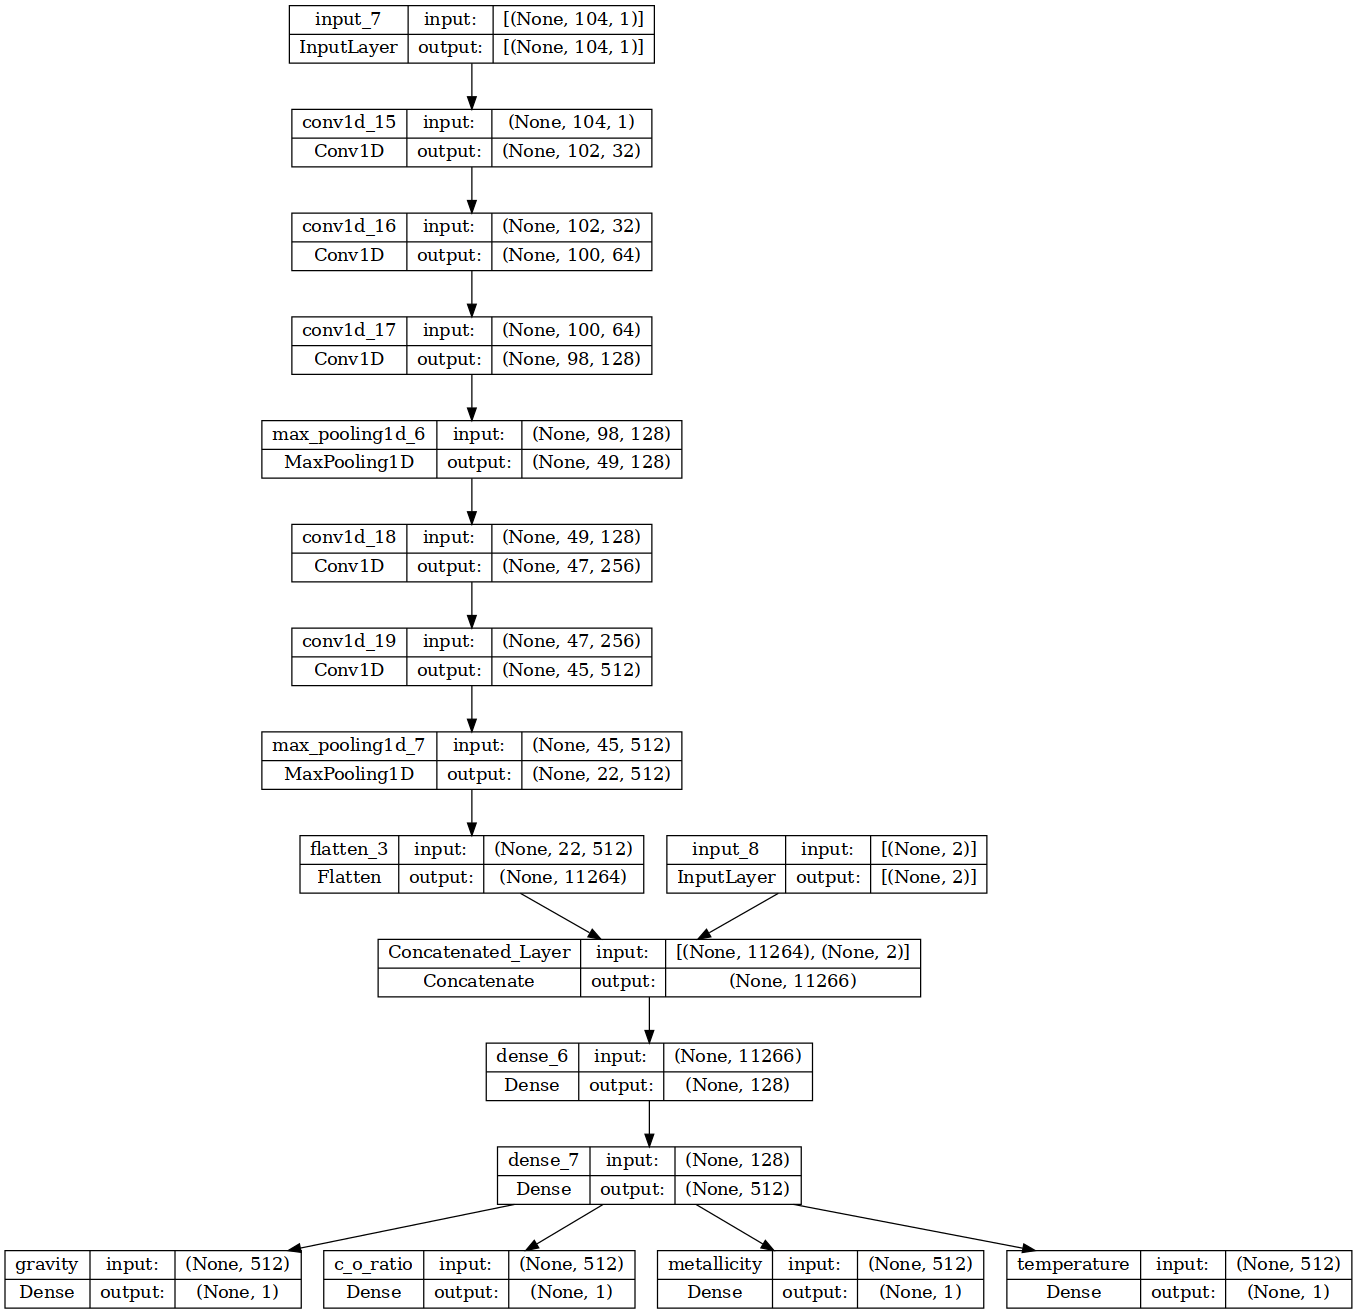

In [119]:
tf.keras.utils.plot_model(
                train_cnn_regression.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
                show_layer_activations=False,
)

In [120]:
train_cnn_regression.trained_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 104, 1)]     0           []                               
                                                                                                  
 conv1d_15 (Conv1D)             (None, 102, 32)      128         ['input_7[0][0]']                
                                                                                                  
 conv1d_16 (Conv1D)             (None, 100, 64)      6208        ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_17 (Conv1D)             (None, 98, 128)      24704       ['conv1d_16[0][0]']              
                                                                                            

In [121]:
train_cnn_regression.plot_model_loss(title = 'X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

In [122]:
# train_cnn_regression.plot_model_loss(title = 'X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### Plot Y predicted vs Y_Actual: Histogram & Scatter plot

In [123]:
# i = 199
# regression_report(
#         trained_model = train_cnn_regression,
    
#         Xtrain = [train_cnn_regression.X_train_standardized_rowwise[::i],
#                   train_cnn_regression.X_train_standardized_columnwise[::i]],
    
#         Xtest  = [train_cnn_regression.X_test_standardized_rowwise[::i], 
#                   train_cnn_regression.X_test_standardized_columnwise[::i]],
    
#         ytrain = train_cnn_regression.y_train_standardized_columnwise[::i],
    
#         ytest  = train_cnn_regression.y_test_standardized_columnwise[::i],
    
#         target_i = 4,
        
#         xy_top   = [0.05, 0.7],
#         xy_bottom= [0.05, 0.85],
#         print_results = False,        
#                  )

# Step 5: Predict Observational data using the trained model

## ROSS 458C

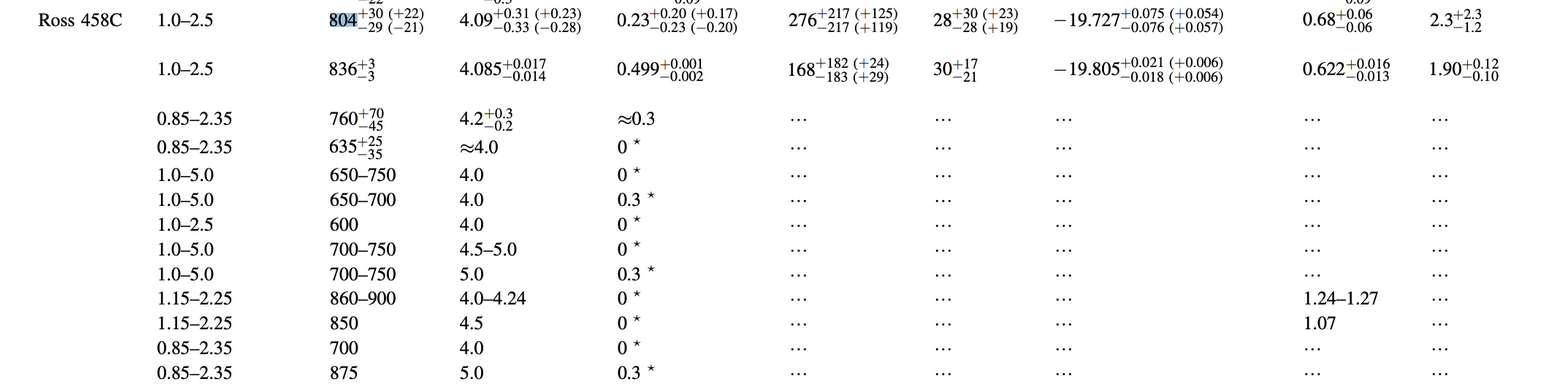

---

Steps: 
- Define the literature reported data for the object
- Instintiate ObsParameterPredictor class
- load_observational_spectra
    - replace negative Flam with zero
    - take the average of neibougrs for Flam_error <= 0
    - plot_observational_spectra_errorbar_
- Process_Observational_Dataset
    - Instintiate ProcessObservationalDataset class
    - define feature_names_synthetic and feature_names_obs
    - flux_interpolated
    - 

In [124]:
# define the brown dwarf literature data for Teff, logg, [M/H], and C/O
# ... and also the distance to the object [in pc] and its radius in Rjup
HD3651B_BD_literature_info = {'bd_name':'HD3651B',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 11.134, 
          'bd_radius_Rjup' : 1.0 * 0.81 } 

Ross458C_BD_literature_info = {'bd_name':'Ross458C',
          'bd_Teff':804,
          'bd_logg':4.09,
          'bd_met': 0.23, 
          'bd_distance_pc' : 11.509, 
          'bd_radius_Rjup' : 1.0 * 0.68 } 

GJ570D_BD_literature_info = {'bd_name':'GJ570D',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 5.884, 
          'bd_radius_Rjup' : 0.89 } #1.06*0.79

In [125]:
brown_dwarf_literature_info = GJ570D_BD_literature_info
predict = ObsParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                training_dataset_df = df,
                                wl = wl, 
                                train_cnn_regression_class = train_cnn_regression,
                                bd_literature_dic = brown_dwarf_literature_info
                                )

In [126]:
predict.load_observational_spectra()

In [127]:
predict.Process_Observational_Dataset(
    __print_results__=False,
    __plot_predicted_vs_observed__=True,
    )

In [128]:
predict.predict_from_random_spectra(random_spectra_num= 20,
                                     __print_results__= True,
                                     __plot_randomly_generated_spectra__= False,
                                     __plot_histogram__= False,
                                     __plot_boxplot_hist__= False,
                                     __plot_predicted_vs_observed__= False,
                                     __plot_predicted_vs_spectra_errorbar__= False,
                                     __plot_predictedRandomSpectra_vs_ObservedSpectra_errorbar__ = True,
                                     __calculate_confidence_intervals_std_df__ = True,
                                    )

******************************

Predicted Targets from Randomly Generated Spectra:
{   'c_o_ratio': 1.8261516094207764,
    'gravity': 5.382306098937988,
    'metallicity': -0.3799038529396057,
    'temperature': 808.0511474609375}
******************************



logg        c_o        met           T
count  20.000000  20.000000  20.000000   20.000000
mean    5.382306   1.826152  -0.379904  808.051147
std     0.153426   0.181622   0.066658   38.991863
min     5.118907   1.538733  -0.478893  742.769226
25%     5.271494   1.737893  -0.434744  777.219421
50%     5.382752   1.797429  -0.384761  805.115173
75%     5.527152   1.915059  -0.334046  838.419754
max     5.622146   2.191490  -0.223313  885.657593

# Optimize the Object Radius

In [203]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

def plot_with_errorbars(x_obs, y_obs, err_obs, x_pre, y_pre, err_pre, title="Data with Error Bars"):
    """
    Create a Bokeh plot with custom error bars for two datasets.

    Args:
        x_obs (array-like): X-axis values for observed dataset.
        y_obs (array-like): Y-axis values for observed dataset.
        err_obs (array-like): Error bars for observed dataset (positive values).
        x_pre (array-like): X-axis values for predicted dataset.
        y_pre (array-like): Y-axis values for predicted dataset.
        err_pre (array-like): Error bars for predicted dataset (positive values).
        title (str): Title of the plot (default is "Data with Error Bars").

    Returns:
        None (Displays the plot).

    """
    # Calculate upper and lower error bars for observed dataset
    upper_err_obs = [y_i + err for y_i, err in zip(y_obs, err_obs)]
    lower_err_obs = [y_i - err for y_i, err in zip(y_obs, err_obs)]

    # Calculate upper and lower error bars for predicted dataset
    upper_err_pre = [y_i + err for y_i, err in zip(y_pre, err_pre)]
    lower_err_pre = [y_i - err for y_i, err in zip(y_pre, err_pre)]

    # Create Bokeh ColumnDataSources for both datasets
    source_obs = ColumnDataSource(data=dict(x_obs=x_obs, y_obs=y_obs, upper_err_obs=upper_err_obs, lower_err_obs=lower_err_obs))
    source_pre = ColumnDataSource(data=dict(x_pre=x_pre, y_pre=y_pre, upper_err_pre=upper_err_pre, lower_err_pre=lower_err_pre))

    p = figure(
        x_axis_label='Features (Wavelength [ùúám])', 
        y_axis_label='Flux (Fùúà)',
        width=800, height=300,
        y_axis_type='log',
        title=title
    )
    
    # Plot data points for observed dataset
    p.circle(x='x_obs', y='y_obs', source=source_obs, size=3, color="blue", legend_label="Observed")

    # Plot custom error bars for observed dataset using the segment glyph
    p.segment(x0='x_obs', y0='lower_err_obs', x1='x_obs', y1='upper_err_obs', line_color="grey", source=source_obs)

    # Plot data points for predicted dataset
    p.square(x='x_pre', y='y_pre', source=source_pre, size=3, color="red", legend_label="Predicted")

    # Plot custom error bars for predicted dataset using the segment glyph
    p.segment(x0='x_pre', y0='lower_err_pre', x1='x_pre', y1='upper_err_pre', line_color="grey", source=source_pre)

    # Add legend
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    # Increase size of x and y ticks
    p.title.text_font_size = '12pt'
    p.xaxis.major_label_text_font_size = '12pt'
    p.xaxis.axis_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    p.yaxis.axis_label_text_font_size = '12pt'


    p.legend.location = "top_right"
    p.legend.background_fill_color = 'white'
    p.legend.background_fill_alpha = 0.5
    
    # Show the plot
    output_notebook()
    show(p)


In [204]:
import numpy as np
from scipy.stats import chi2
from scipy.interpolate import interp1d
from scipy.stats import chisquare

def chi_square_test(data1, data2, error1, error2, x1, x2):
    """
    Perform the chi-square test to evaluate the similarity between two datasets with error bars.
    
    Args:
        data1 (array-like): The first dataset.
        data2 (array-like): The second dataset.
        error1 (array-like): The error bars associated with the first dataset.
        error2 (array-like): The error bars associated with the second dataset.
        num_points (int): The number of points to interpolate for datasets with different lengths.
    
    Returns:
        float: The chi-square test statistic.
        float: The p-value.
    
    Raises:
        ValueError: If the lengths of the datasets or error bars are not equal.
    
    """
    # Convert input to NumPy arrays for easier calculations
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    error1 = np.asarray(error1)
    error2 = np.asarray(error2)
    
    num_points = len(x2)
    
    # Interpolate datasets if they have different lengths
    if len(data1) != len(data2):
        f1 = interp1d(x1, data1, kind='quadratic', fill_value='extrapolate') #interp1d(x1, data1, kind='quadratic')
        f2 = interp1d(x2, data2, kind='quadratic', fill_value='extrapolate')
        data1 = f1(x2)
        data2 = f2(x2)

        f_error1 = interp1d(x1, error1, kind='quadratic', fill_value='extrapolate')
        f_error2 = interp1d(x2, error2, kind='quadratic', fill_value='extrapolate')
        error1 = f_error1(x2)
        error2 = f_error2(x2)
        
        # print(error1)
    
    # Calculate the chi-square test statistic
    chi2_stat = np.round( np.sum(((data1 - data2) / np.sqrt(error1**2 + error2**2))**2), 2)
    
    # Calculate the degrees of freedom
    degrees_of_freedom = len(data1) - 1
    
    # Calculate the p-value using the chi-square distribution
    p_value = "{:.2e}".format( 1.0 - chi2.cdf(chi2_stat, degrees_of_freedom) )
    # p_value = '{:.2e}'.p_value
    
    plot_with_errorbars(x2, data1, error1, x2, data2, error2, title=f"ùõò2={chi2_stat}, p-value={p_value}")
    
    return chi2_stat, p_value


In [205]:
data1 = predict.Fnu_obs_absolute
error1 = predict.Fnu_obs_absolute_err
x1 = predict.obs_data_df['wl']

In [206]:
data2 = predict.confidence_intervals_std_df['mean']
error2 = predict.confidence_intervals_std_df['std_values']
x2 = predict.confidence_intervals_std_df['wl'].values[::-1]

In [207]:
chi_square_test(data1, data2, error1, error2, x1, x2)

Loading BokehJS ...

(148.92, '2.09e-03')

In [208]:
R_list = []
chi_square_list = []
p_value_list = []

for r in list( np.linspace(1.1,1.2, num=int((1.5-0.6)/.2) )):
    
    GJ570D_BD_literature_info = {'bd_name':'GJ570D',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 5.884, 
          'bd_radius_Rjup' : r*0.79 } 

    brown_dwarf_literature_info = GJ570D_BD_literature_info
    predict = ObsParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                    training_dataset_df = df,
                                    wl = wl, 
                                    train_cnn_regression_class = train_cnn_regression,
                                    bd_literature_dic = brown_dwarf_literature_info
                                    )
    predict.load_observational_spectra()
    
    predict.Process_Observational_Dataset(
    __print_results__=False,
    __plot_predicted_vs_observed__=False,
    )

    predict.predict_from_random_spectra(random_spectra_num= 20,
                                         __print_results__= False,
                                         __plot_randomly_generated_spectra__= False,
                                         __plot_histogram__= False,
                                         __plot_boxplot_hist__= False,
                                         __plot_predicted_vs_observed__= False,
                                         __plot_predicted_vs_spectra_errorbar__= False,
                                         __plot_predictedRandomSpectra_vs_ObservedSpectra_errorbar__ = False,
                                         __calculate_confidence_intervals_std_df__ = True,
                                        )
    
    data1 = predict.Fnu_obs_absolute
    error1 = predict.Fnu_obs_absolute_err
    x1 = predict.obs_data_df['wl']
    
    data2 = predict.confidence_intervals_std_df['mean']
    error2 = predict.confidence_intervals_std_df['std_values']
    x2 = predict.confidence_intervals_std_df['wl'].values[::-1]
    
    # plot_with_errorbars(x1, data1, error1, x2, data2, error2, title="Data with Error Bars")
    
    chi_square, p_value = chi_square_test(data1, data2, error1, error2, x1, x2)
    if chi_square != None and p_value != np.nan:
        R_list.append(r*0.79)
        chi_square_list.append(chi_square)
        p_value_list.append(p_value)
    
        print(r, r*0.79,chi_square, p_value )

Loading BokehJS ...

1.1 0.8690000000000001 177.26 7.56e-06


Loading BokehJS ...

1.1333333333333333 0.8953333333333333 nan nan


Loading BokehJS ...

1.1666666666666667 0.9216666666666667 142.85 5.74e-03


Loading BokehJS ...

1.2 0.948 138.08 1.20e-02


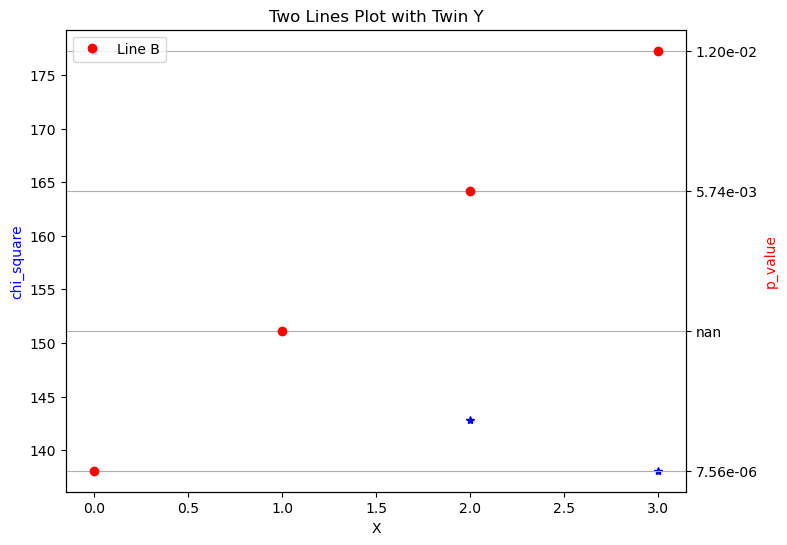

In [209]:
import matplotlib.pyplot as plt

def plot_two_lines_with_twin_y(x, y1, y2, label1='Line 1', label2='Line 2', xlabel='X-axis', ylabel1='Y-axis 1', ylabel2='Y-axis 2', title='Two Lines Plot with Twin Y'):
    """
    Plot two lines on the same plot with twin y-axis.
    
    Args:
        x (array-like): The x-axis values.
        y1 (array-like): The y-axis values for the first line.
        y2 (array-like): The y-axis values for the second line.
        label1 (str): Label for the first line (default is 'Line 1').
        label2 (str): Label for the second line (default is 'Line 2').
        xlabel (str): Label for the x-axis (default is 'X-axis').
        ylabel1 (str): Label for the first y-axis (default is 'Y-axis 1').
        ylabel2 (str): Label for the second y-axis (default is 'Y-axis 2').
        title (str): Title for the plot (default is 'Two Lines Plot with Twin Y').
    
    Returns:
        None (displays the plot).
    """
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Plot the first line
    ax1.plot(x, y1, 'b*', label=label1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color='blue')

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Plot the second line
    ax2.plot(x, y2, 'ro', label=label2)
    ax2.set_ylabel(ylabel2, color='red')

    # Set plot title and show legend
    plt.title(title)
    plt.legend(loc='upper left')

    plt.grid(True)
    plt.show()

# Example usage:
# x_values = [1, 2, 3, 4, 5]
# y_values1 = [1, 2, 1, 2, 3]
# y_values2 = [5, 15, 10, 20, 25]

plot_two_lines_with_twin_y(range(len(chi_square_list)), 
                           chi_square_list, p_value_list, 
                           label1='chi_square', label2='Line B', 
                           xlabel='X', ylabel1='chi_square', ylabel2='p_value', title='Two Lines Plot with Twin Y')


# plot_two_lines_with_twin_y(R_list, chi_square_list, p_value_list, 
#                label1='chi_square_list', label2='p_value_list', 
#                xlabel='chi_square_list', ylabel='p_value_list', 
#                title='Two Lines Plot Example')


# plt.plot(R_list,chi_square_list, '.-')
# plt.semilogy(R_list,p_value_list, '.')

In [210]:
from scipy.stats import chi2

def find_closest_chi_square(df, chi_square_statistic_list):
    """
    Find the closest chi-square test and p-value for a given degrees of freedom (df).

    Args:
        df (int): Degrees of freedom for the chi-square test.
        chi_square_statistic_list (list): List of chi-square test statistics.

    Returns:
        float: The closest chi-square test statistic.
        float: The p-value corresponding to the closest chi-square test.

    """
    # Significance level (alpha)
    alpha = 0.05

    # Calculate the critical value for the given significance level and df
    critical_value = chi2.ppf(1 - alpha, df)

    closest_chi_square = None
    closest_p_value = None
    closest_difference = float('inf')

    for chi_square in chi_square_statistic_list:
        # Calculate the p-value
        p_value = 1.0 - chi2.cdf(chi_square, df)

        # Calculate the absolute difference between the chi-square statistic and the critical value
        difference = abs(chi_square - critical_value)

        # Update closest_chi_square and closest_p_value if the current test has a smaller difference
        if difference < closest_difference:
            closest_chi_square = chi_square
            closest_p_value = p_value
            closest_difference = difference

    return closest_chi_square, closest_p_value

# Example usage with df = 103 and chi_square_list containing chi-square statistics
df_value = 103
# chi_square_list = [93, 32,  150.456789123, 120.789123456]  # Replace with actual chi-square statistics

closest_chi_square, closest_p_value = find_closest_chi_square(df_value, chi_square_list)

print("Closest Chi-Square Statistic:", closest_chi_square)
print("P-value:", closest_p_value)

# check_chi_square(103, chi_square_list)


Closest Chi-Square Statistic: 138.08
P-value: 0.01201436019026203


In [211]:
chi_square_list

[177.26, nan, 142.85, 138.08]

---

# END ------